# Yelp Open Data Project
- UC Davis Data Studies Summer Series
- September 9, 2015
- Graham Sarasy, Shubhangi Srivastava, Andrew Tom, Iris Xie, Adam Zhu
- Mentors:
  - Prof. Duncan Temple Lang
  - Prof. Joe Dumit

In [48]:
print(load(url("http://eeyore.ucdavis.edu/sts198/Data/Yelp/yelpColleges2.rda")))

[1] "business" "review"   "users"   


In [49]:
w = grepl("Restaurants", business$categories)
bids = business[ w & business$city == "Los Angeles", ]

In [50]:
rev = subset(review, business_id %in% bids$business_id)
# tt is a table of businesses with the most reviews
tt = sort(table(rev$business_id))

In [67]:
tmp = data.frame(numReviews = unclass( tt[ bids$business_id ]) , open = bids$open,
                  avgStars = tapply(rev$stars, rev$business_id, mean)[bids$business_id],
                  business_id = bids$business_id)

# EDA

In [51]:
library(lattice)

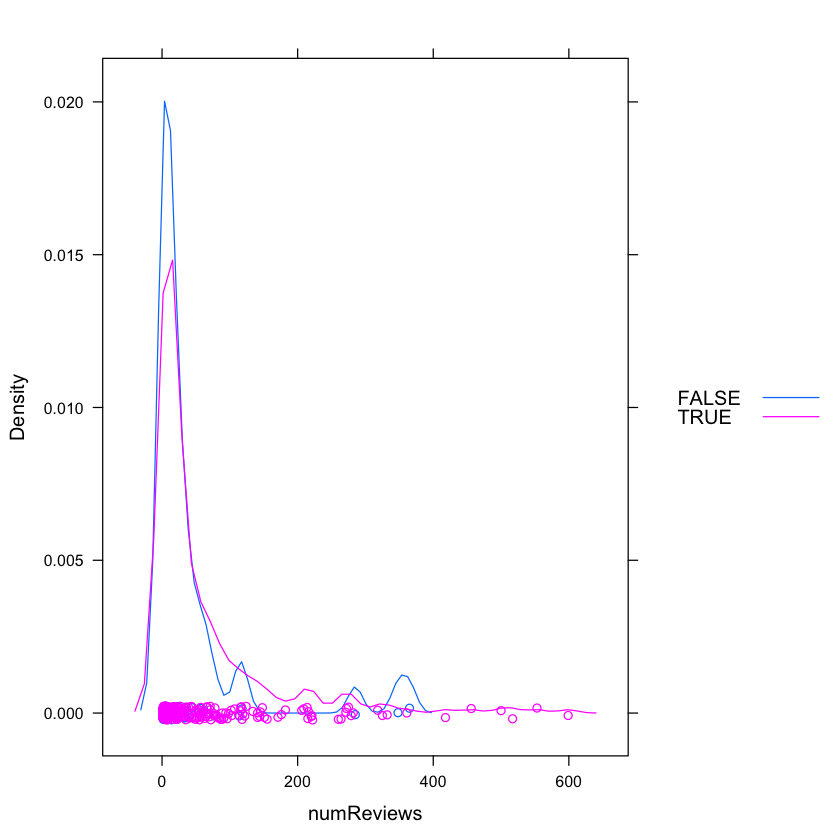

In [52]:
densityplot(~ numReviews, tmp, group = open, auto.key = list(space = "right"))

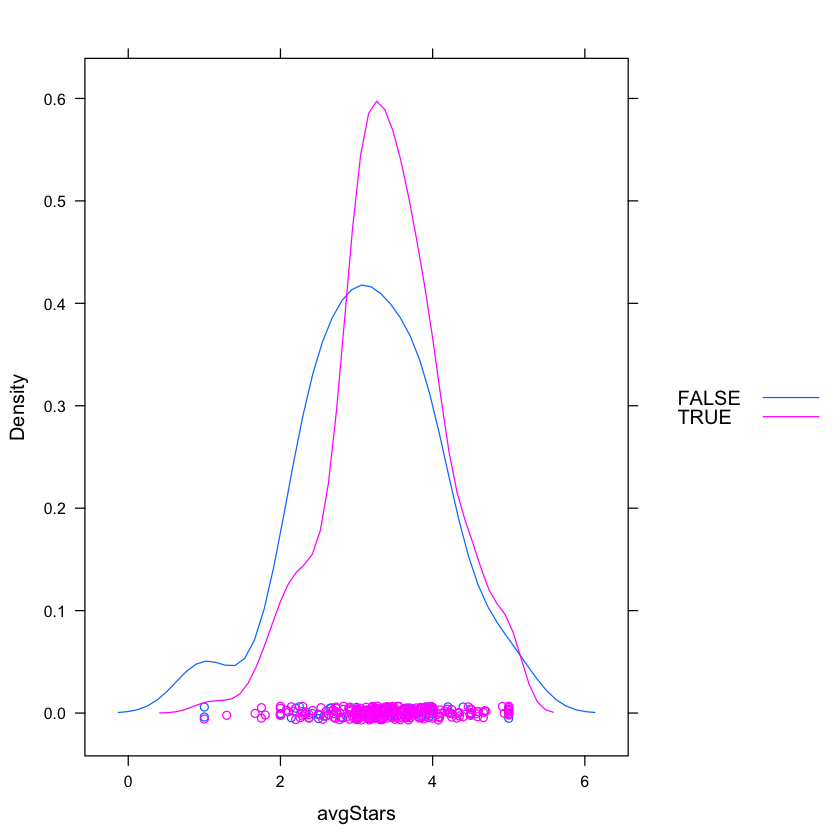

In [53]:
densityplot(~ avgStars, tmp, group = open, auto.key = list(space = "right"))

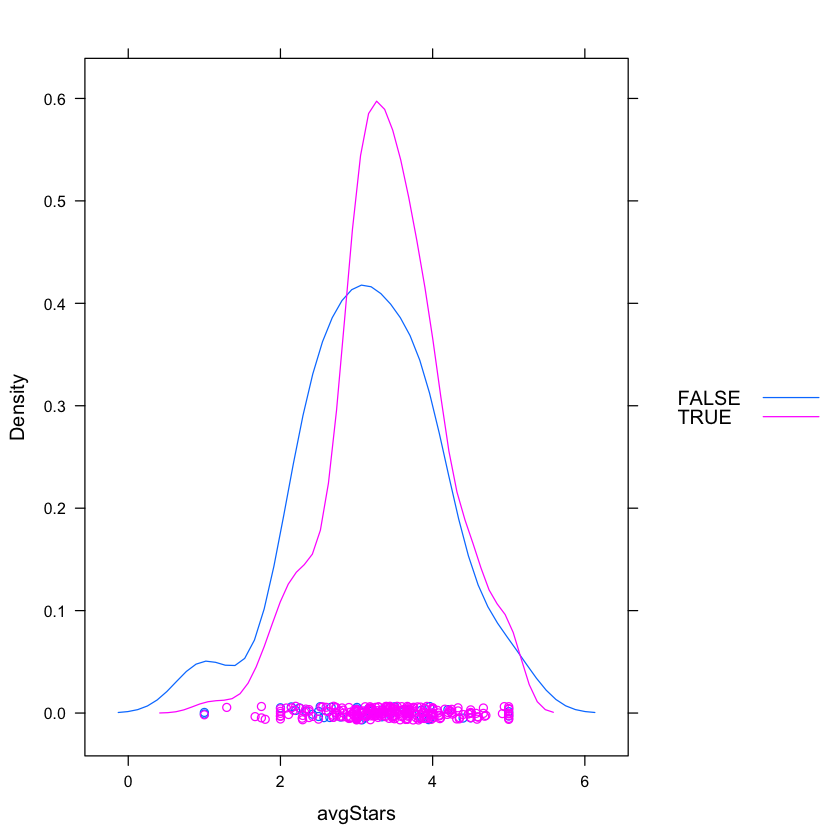

In [54]:
densityplot(~ avgStars, tmp, group = open, auto.key = list (space = "right"))

In [55]:
#This overlays the lat and lon of businesses in Berkeley 
#open/closed as green/red
install.packages("ggplot2")
library(ggplot2)
install.packages("RgoogleMaps")
library(RgoogleMaps)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


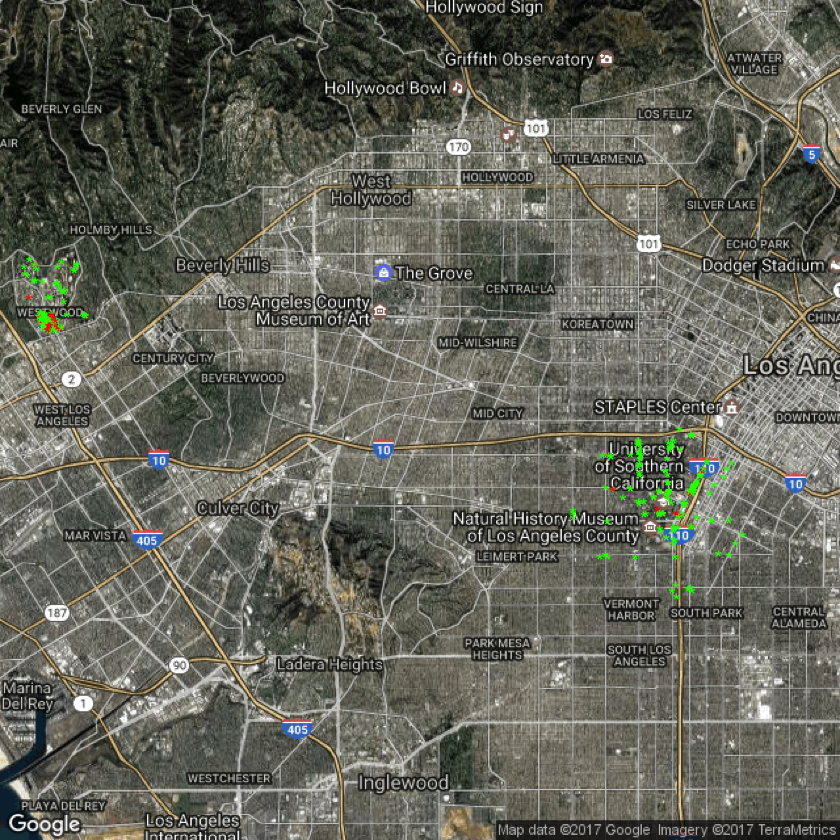

In [56]:
center = c(mean(bids$lat, na.rm = TRUE), mean(bids$lon, na.rm = TRUE))
zoom <- min(MaxZoom(range(bids$lat, na.rm = TRUE), range(bids$lon, na.rm = TRUE)))
map <- GetMap(center = center, zoom = zoom, maptype = "hybrid")
colors = c("red", "green")
PlotOnStaticMap(map, lat = bids$latitude, lon = bids$longitude, pch = "*", col = colors[bids$open + 1L])

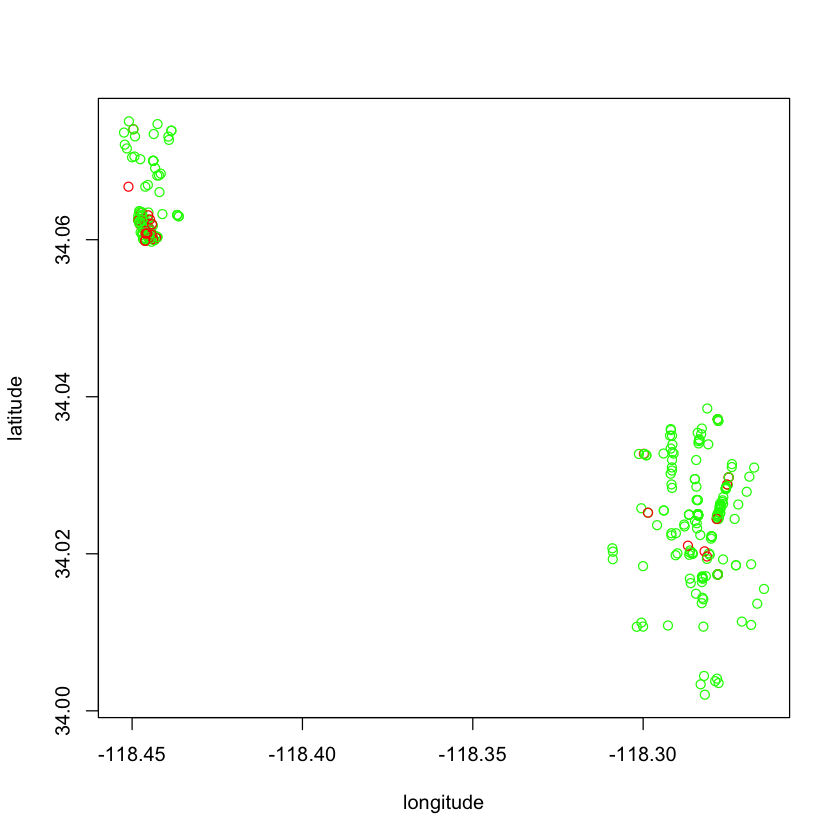

In [57]:
with(bids, plot(longitude, latitude,  col = c("red", "green")[bids$open+1L]))

In [58]:
i = which.max(tmp$numReviews)

b1 = subset(rev, business_id == names(i))

In [59]:
# Are there many users with multiple review
# sort(table(rev$user_id))
tt = sort(table(rev$user_id))

In [60]:
# sort(table(rev$user_id))
tts = sort(table(rev$user_id))

In [61]:
#which.max(rev$numReviews)
ttm = which.max(rev$numReviews)

In [68]:
#sort(table(tmp$numReviews))
ids = sort(table(tmp$numReviews))

In [69]:
# Let's look at the second most prolific reviewer
id = "FupbUDKwsiLnJ2epwYs9pw"
id = "s1kcPeZm4tueIoC0mnafCg"
id = "cWC1aSv6ql0nBzHX_0a6MQ"

#unique(rev$business_id)
busIds = unique(rev$business_id)

In [70]:
M = matrix(NA, length(tt), length(busIds),  
           dimnames = list(names(tt), busIds))

# Recommender System Development

In [72]:
# Do a holdout set
holdOut = sample(busIds , 4)
#holdOut = sample(busIds[ !is.na(M[id, busIds]) ], 4)
trainBusIds = busIds = setdiff(busIds, holdOut)

In [82]:
# Build dataframe for recommendation
for(i in names(tmp)) {
    sub = subset(rev, user_id == i)
    M[i, sub$business_id] = sub$stars}

In [88]:
dim(M)

[1]   0 308

In [108]:
M = M[ rowSums(!is.na(M)) > 5, ]
D = as.matrix(dist(M[, busIds]))
dim(M)

[1]   0 308

In [109]:
# Something breaks here
bs = which(!is.na(M[id, ]))

ERROR: Error in M[id, ]: subscript out of bounds


In [110]:
neigh = sort(D[id,][D[id, ] > 0])[1:10]

ERROR: Error in D[id, ]: subscript out of bounds


In [106]:
bus = "qHmamQPCAKkia9X0uryA8g"

In [114]:
# Get the user and its neighbor, and then discard all the columns
# when that business is not reviewed by  any of these.
tmp = M[names(neigh), ]
tmp = tmp[ , apply(tmp, 2, function(x) !all(is.na(x)))]

preds = apply(tmp, 2, mean, na.rm = TRUE)

actual = M[id, names(preds)]
actual = actual[!is.na(actual)]

error = actual - preds[names(actual)]
table(error)

ERROR: Error in eval(expr, envir, enclos): object 'neigh' not found
